In [39]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [6]:
!python ../scripts/mscxr/precompute_phrase_embeddings.py \
--model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231018_230637_MIMIC-CXR(triplets+classif+entcont+nli+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)"

len(phrases): 715
Obtaining embeddings for each phrase...
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt']
  0%|                                                   | 0/715 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=426,702090393457262989).pkl
len(self.cache["hashes"]) = 28859
self.cache["embeddings"].shape = (28859, 128)
100%|██████████████████████████████████████| 715/715 [00:00<00:00, 22781.45it/s]
Computing embeddings for 698 new texts
Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+

In [11]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 200 \
--batches_per_epoch 500 \
--max_images_per_batch 25 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 2 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,7e-5,8,2e-6,7e-5,8,2e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.5 \
--mask_exponent 0.4 \
--use_amp \
--save

script's arguments:
   epochs: 200
   batches_per_epoch: 500
   max_images_per_batch: 25
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 2
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   yolov8_use_one_detector_per_dataset: False
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosin

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:39, 5737.72it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

chestimgbbiou 0.97252, phrase_acc 0.99435, cibg_segmask_iou 0.56484, 23.16 secs
---- Epoch 13/200
(1) Training stage (lr = 0.000070) ...
loss 1.77890, y8_loss 2.28096, y8box_loss 0.79702, y8cls_loss 0.38794, y8dfl_loss 1.09601, phrase_acc 0.99447, phrcls_loss 0.01628, cibg_att_sup_loss 0.52186, cibg_segmask_iou 0.60333, pg_att_sup_loss 0.73870, pg_segmask_iou 0.61450, 133.32 secs
(2) Validation stage ...
chestimgbbiou 0.86415, phrase_acc 0.08873, cibg_segmask_iou 0.16073, 12.54 secs
---- Epoch 14/200
(1) Training stage (lr = 0.000042) ...
loss 1.68282, y8_loss 2.28720, y8box_loss 0.79903, y8cls_loss 0.38981, y8dfl_loss 1.09837, phrase_acc 0.99482, phrcls_loss 0.01503, cibg_att_sup_loss 0.48687, cibg_segmask_iou 0.61502, pg_att_sup_loss 0.57653, pg_segmask_iou 0.67517, 136.90 secs
(2) Validation stage ...
chestimgbbiou 0.96437, phrase_acc 0.99127, cibg_segmask_iou 0.51212, 22.40 secs
---- Epoch 15/200
(1) Training stage (lr = 0.000025) ...
loss 1.55859, y8_loss 2.20139, y8box_loss 0.760

chestimgbbiou 0.96413, phrase_acc 0.98250, cibg_segmask_iou 0.48166, 24.07 secs
---- Epoch 33/200
(1) Training stage (lr = 0.000009) ...
loss 1.37947, y8_loss 2.17495, y8box_loss 0.74821, y8cls_loss 0.35786, y8dfl_loss 1.06888, phrase_acc 0.99649, phrcls_loss 0.01071, cibg_att_sup_loss 0.42060, cibg_segmask_iou 0.63819, pg_att_sup_loss 0.15269, pg_segmask_iou 0.86846, 137.62 secs
(2) Validation stage ...
chestimgbbiou 0.96994, phrase_acc 0.99408, cibg_segmask_iou 0.51654, 23.83 secs
---- Epoch 34/200
(1) Training stage (lr = 0.000006) ...
loss 1.37469, y8_loss 2.17599, y8box_loss 0.74900, y8cls_loss 0.35764, y8dfl_loss 1.06934, phrase_acc 0.99623, phrcls_loss 0.01092, cibg_att_sup_loss 0.42162, cibg_segmask_iou 0.63877, pg_att_sup_loss 0.14086, pg_segmask_iou 0.87661, 135.69 secs
(2) Validation stage ...
chestimgbbiou 0.97050, phrase_acc 0.99096, cibg_segmask_iou 0.51472, 22.86 secs
---- Epoch 35/200
(1) Training stage (lr = 0.000003) ...
loss 1.34425, y8_loss 2.14022, y8box_loss 0.733

In [12]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231201_080629_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 200 \
--batches_per_epoch 500 \
--max_images_per_batch 25 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 2 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,6e-5,8,1e-6,6e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.5 \
--mask_exponent 0.4 \
--chest_imagenome_anatlocs_weight 4.0 \
--mscxr_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 200
   batches_per_epoch: 500
   max_images_per_batch: 25
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 2
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231201_080629_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   yolov8_use_one_detector_per_dataset: False
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:42, 5314.43it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

loss 2.07407, y8_loss 2.07517, y8box_loss 0.70244, y8cls_loss 0.32957, y8dfl_loss 1.04316, phrase_acc 0.99749, phrcls_loss 0.00732, cibg_att_sup_loss 0.39457, cibg_segmask_iou 0.65524, pg_att_sup_loss 0.46211, pg_segmask_iou 0.71497, 126.56 secs
(2) Validation stage ...
chestimgbbiou 0.97279, phrase_acc 0.99465, cibg_segmask_iou 0.61568, 23.02 secs
New checkpoint saved: checkpoint_12_chou+ciou+pgou+phcc=0.8539.pt
---- Epoch 13/200
(1) Training stage (lr = 0.000060) ...
loss 2.26567, y8_loss 2.21268, y8box_loss 0.76713, y8cls_loss 0.36738, y8dfl_loss 1.07817, phrase_acc 0.99648, phrcls_loss 0.01154, cibg_att_sup_loss 0.43681, cibg_segmask_iou 0.64129, pg_att_sup_loss 0.68419, pg_segmask_iou 0.63781, 127.13 secs
(2) Validation stage ...
chestimgbbiou 0.89739, phrase_acc 0.85346, cibg_segmask_iou 0.30013, 19.19 secs
---- Epoch 14/200
(1) Training stage (lr = 0.000033) ...
loss 2.25758, y8_loss 2.21293, y8box_loss 0.76642, y8cls_loss 0.36711, y8dfl_loss 1.07940, phrase_acc 0.99573, phrcls_

chestimgbbiou 0.95258, phrase_acc 0.98881, cibg_segmask_iou 0.54055, 23.13 secs
---- Epoch 32/200
(1) Training stage (lr = 0.000010) ...
loss 2.09252, y8_loss 2.12891, y8box_loss 0.72792, y8cls_loss 0.34336, y8dfl_loss 1.05763, phrase_acc 0.99673, phrcls_loss 0.00938, cibg_att_sup_loss 0.39376, cibg_segmask_iou 0.65758, pg_att_sup_loss 0.33444, pg_segmask_iou 0.77413, 127.84 secs
(2) Validation stage ...
chestimgbbiou 0.96890, phrase_acc 0.99642, cibg_segmask_iou 0.60327, 24.54 secs
---- Epoch 33/200
(1) Training stage (lr = 0.000006) ...
loss 2.08515, y8_loss 2.12565, y8box_loss 0.72689, y8cls_loss 0.34221, y8dfl_loss 1.05655, phrase_acc 0.99609, phrcls_loss 0.01108, cibg_att_sup_loss 0.39162, cibg_segmask_iou 0.65880, pg_att_sup_loss 0.31235, pg_segmask_iou 0.77511, 129.46 secs
(2) Validation stage ...
chestimgbbiou 0.96987, phrase_acc 0.99531, cibg_segmask_iou 0.59284, 23.45 secs
---- Epoch 34/200
(1) Training stage (lr = 0.000003) ...
loss 2.06860, y8_loss 2.11677, y8box_loss 0.722

chestimgbbiou 0.97220, phrase_acc 0.99381, cibg_segmask_iou 0.61073, 22.59 secs
New checkpoint saved: checkpoint_51_chou+ciou+pgou+phcc=0.8564.pt
---- Epoch 52/200
(1) Training stage (lr = 0.000001) ...
loss 1.99791, y8_loss 2.06798, y8box_loss 0.69821, y8cls_loss 0.32983, y8dfl_loss 1.03994, phrase_acc 0.99680, phrcls_loss 0.00880, cibg_att_sup_loss 0.36983, cibg_segmask_iou 0.66942, pg_att_sup_loss 0.20310, pg_segmask_iou 0.83483, 129.15 secs
(2) Validation stage ...
chestimgbbiou 0.97203, phrase_acc 0.99462, cibg_segmask_iou 0.59550, 23.29 secs
---- Epoch 53/200
(1) Training stage (lr = 0.000060) ...
loss 2.12989, y8_loss 2.17085, y8box_loss 0.74959, y8cls_loss 0.35583, y8dfl_loss 1.06543, phrase_acc 0.99629, phrcls_loss 0.01112, cibg_att_sup_loss 0.39360, cibg_segmask_iou 0.66320, pg_att_sup_loss 0.34715, pg_segmask_iou 0.77234, 127.15 secs
(2) Validation stage ...
chestimgbbiou 0.92150, phrase_acc 0.97273, cibg_segmask_iou 0.37478, 21.61 secs
---- Epoch 54/200
(1) Training stage (

loss 2.06589, y8_loss 2.14109, y8box_loss 0.73468, y8cls_loss 0.34669, y8dfl_loss 1.05972, phrase_acc 0.99639, phrcls_loss 0.01023, cibg_att_sup_loss 0.37380, cibg_segmask_iou 0.67501, pg_att_sup_loss 0.22898, pg_segmask_iou 0.83616, 136.36 secs
(2) Validation stage ...
chestimgbbiou 0.96277, phrase_acc 0.99242, cibg_segmask_iou 0.59146, 26.13 secs
---- Epoch 72/200
(1) Training stage (lr = 0.000010) ...
loss 2.02121, y8_loss 2.10938, y8box_loss 0.72178, y8cls_loss 0.33686, y8dfl_loss 1.05074, phrase_acc 0.99705, phrcls_loss 0.00832, cibg_att_sup_loss 0.36543, cibg_segmask_iou 0.67888, pg_att_sup_loss 0.17354, pg_segmask_iou 0.85482, 134.38 secs
(2) Validation stage ...
chestimgbbiou 0.97018, phrase_acc 0.99735, cibg_segmask_iou 0.62452, 25.11 secs
New checkpoint saved: checkpoint_72_chou+ciou+pgou+phcc=0.8620.pt
---- Epoch 73/200
(1) Training stage (lr = 0.000006) ...
loss 2.00407, y8_loss 2.09480, y8box_loss 0.71219, y8cls_loss 0.33484, y8dfl_loss 1.04777, phrase_acc 0.99661, phrcls_

chestimgbbiou 0.97262, phrase_acc 0.99492, cibg_segmask_iou 0.62017, 24.28 secs
---- Epoch 91/200
(1) Training stage (lr = 0.000002) ...
loss 1.99825, y8_loss 2.10147, y8box_loss 0.71603, y8cls_loss 0.33489, y8dfl_loss 1.05055, phrase_acc 0.99663, phrcls_loss 0.00959, cibg_att_sup_loss 0.35733, cibg_segmask_iou 0.68658, pg_att_sup_loss 0.11768, pg_segmask_iou 0.88784, 128.52 secs
(2) Validation stage ...
chestimgbbiou 0.97269, phrase_acc 0.99504, cibg_segmask_iou 0.62682, 24.19 secs
---- Epoch 92/200
(1) Training stage (lr = 0.000001) ...
loss 1.97867, y8_loss 2.08363, y8box_loss 0.70827, y8cls_loss 0.33098, y8dfl_loss 1.04438, phrase_acc 0.99734, phrcls_loss 0.00864, cibg_att_sup_loss 0.34828, cibg_segmask_iou 0.68965, pg_att_sup_loss 0.13112, pg_segmask_iou 0.87995, 130.69 secs
(2) Validation stage ...
chestimgbbiou 0.97268, phrase_acc 0.99473, cibg_segmask_iou 0.61854, 24.42 secs
---- Epoch 93/200
(1) Training stage (lr = 0.000060) ...
loss 2.18901, y8_loss 2.22590, y8box_loss 0.772

chestimgbbiou 0.95072, phrase_acc 0.98538, cibg_segmask_iou 0.57657, 16.55 secs
---- Epoch 111/200
(1) Training stage (lr = 0.000019) ...
loss 2.02865, y8_loss 2.13229, y8box_loss 0.73148, y8cls_loss 0.34362, y8dfl_loss 1.05719, phrase_acc 0.99652, phrcls_loss 0.01014, cibg_att_sup_loss 0.35325, cibg_segmask_iou 0.69414, pg_att_sup_loss 0.16053, pg_segmask_iou 0.87308, 119.24 secs
(2) Validation stage ...
chestimgbbiou 0.96291, phrase_acc 0.99108, cibg_segmask_iou 0.60313, 16.65 secs
---- Epoch 112/200
(1) Training stage (lr = 0.000010) ...
loss 1.98842, y8_loss 2.09956, y8box_loss 0.71620, y8cls_loss 0.33476, y8dfl_loss 1.04861, phrase_acc 0.99664, phrcls_loss 0.00947, cibg_att_sup_loss 0.34435, cibg_segmask_iou 0.69847, pg_att_sup_loss 0.12856, pg_segmask_iou 0.88846, 119.03 secs
(2) Validation stage ...
chestimgbbiou 0.96950, phrase_acc 0.99212, cibg_segmask_iou 0.61791, 16.73 secs
---- Epoch 113/200
(1) Training stage (lr = 0.000006) ...
loss 1.99157, y8_loss 2.10338, y8box_loss 0.

chestimgbbiou 0.97244, phrase_acc 0.99423, cibg_segmask_iou 0.60960, 16.82 secs
---- Epoch 131/200
(1) Training stage (lr = 0.000002) ...
loss 1.95768, y8_loss 2.07774, y8box_loss 0.70426, y8cls_loss 0.33040, y8dfl_loss 1.04307, phrase_acc 0.99641, phrcls_loss 0.00968, cibg_att_sup_loss 0.33511, cibg_segmask_iou 0.70517, pg_att_sup_loss 0.09826, pg_segmask_iou 0.91018, 119.38 secs
(2) Validation stage ...
chestimgbbiou 0.97269, phrase_acc 0.99442, cibg_segmask_iou 0.60705, 16.68 secs
---- Epoch 132/200
(1) Training stage (lr = 0.000001) ...
loss 1.96553, y8_loss 2.08531, y8box_loss 0.70897, y8cls_loss 0.33103, y8dfl_loss 1.04531, phrase_acc 0.99667, phrcls_loss 0.00945, cibg_att_sup_loss 0.33660, cibg_segmask_iou 0.70464, pg_att_sup_loss 0.10222, pg_segmask_iou 0.90336, 121.28 secs
(2) Validation stage ...
chestimgbbiou 0.97286, phrase_acc 0.99481, cibg_segmask_iou 0.62012, 16.67 secs
---- Epoch 133/200
(1) Training stage (lr = 0.000060) ...
loss 2.21532, y8_loss 2.24505, y8box_loss 0.

loss 2.05887, y8_loss 2.16632, y8box_loss 0.74674, y8cls_loss 0.35301, y8dfl_loss 1.06657, phrase_acc 0.99656, phrcls_loss 0.01022, cibg_att_sup_loss 0.34909, cibg_segmask_iou 0.70449, pg_att_sup_loss 0.19179, pg_segmask_iou 0.86530, 130.22 secs
(2) Validation stage ...
chestimgbbiou 0.91708, phrase_acc 0.88608, cibg_segmask_iou 0.39440, 20.00 secs
---- Epoch 151/200
(1) Training stage (lr = 0.000019) ...
loss 1.99885, y8_loss 2.11304, y8box_loss 0.72159, y8cls_loss 0.34065, y8dfl_loss 1.05080, phrase_acc 0.99652, phrcls_loss 0.00967, cibg_att_sup_loss 0.33762, cibg_segmask_iou 0.70788, pg_att_sup_loss 0.15294, pg_segmask_iou 0.88600, 131.66 secs
(2) Validation stage ...
chestimgbbiou 0.96599, phrase_acc 0.99550, cibg_segmask_iou 0.62479, 23.28 secs
---- Epoch 152/200
(1) Training stage (lr = 0.000010) ...
loss 1.96685, y8_loss 2.08839, y8box_loss 0.70958, y8cls_loss 0.33253, y8dfl_loss 1.04629, phrase_acc 0.99634, phrcls_loss 0.01019, cibg_att_sup_loss 0.33278, cibg_segmask_iou 0.7106

chestimgbbiou 0.97060, phrase_acc 0.99338, cibg_segmask_iou 0.64225, 23.10 secs
---- Epoch 170/200
(1) Training stage (lr = 0.000003) ...
loss 1.94720, y8_loss 2.08038, y8box_loss 0.70780, y8cls_loss 0.32880, y8dfl_loss 1.04377, phrase_acc 0.99689, phrcls_loss 0.00932, cibg_att_sup_loss 0.32319, cibg_segmask_iou 0.71951, pg_att_sup_loss 0.08444, pg_segmask_iou 0.92450, 123.65 secs
(2) Validation stage ...
chestimgbbiou 0.97229, phrase_acc 0.99423, cibg_segmask_iou 0.63874, 23.78 secs
---- Epoch 171/200
(1) Training stage (lr = 0.000002) ...
loss 1.94544, y8_loss 2.07858, y8box_loss 0.70673, y8cls_loss 0.32860, y8dfl_loss 1.04325, phrase_acc 0.99669, phrcls_loss 0.00933, cibg_att_sup_loss 0.32399, cibg_segmask_iou 0.71900, pg_att_sup_loss 0.07958, pg_segmask_iou 0.92503, 125.47 secs
(2) Validation stage ...
chestimgbbiou 0.97297, phrase_acc 0.99488, cibg_segmask_iou 0.64059, 25.94 secs
---- Epoch 172/200
(1) Training stage (lr = 0.000001) ...
loss 1.92037, y8_loss 2.05711, y8box_loss 0.

In [45]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5" \
--epochs 200 \
--batches_per_epoch 500 \
--max_images_per_batch 25 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 2 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,8e-5,8,1e-6,8e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--use_mscxr_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.2 \
--mask_exponent 0.5 \
--chest_imagenome_anatlocs_weight 3.0 \
--mscxr_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 200
   batches_per_epoch: 500
   max_images_per_batch: 25
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 2
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   yolov8_use_one_detector_per_dataset: False
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosine_args: None
   wa

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:03, 57593.99it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 cari

loss 3.63499, y8_loss 2.65528, y8box_loss 0.93476, y8cls_loss 0.50666, y8dfl_loss 1.21387, phrase_acc 0.99193, phrcls_loss 0.24793, cibg_att_sup_loss 1.64602, cibg_segmask_iou 0.18194, pg_att_sup_loss 0.89226, pg_segmask_iou 0.41170, 132.83 secs
(2) Validation stage ...
chestimgbbiou 0.96339, phrase_acc 0.99850, cibg_segmask_iou 0.15700, pg_segmask_iou 0.28821, 27.59 secs
---- Epoch 9/200
(1) Training stage (lr = 0.000005) ...
loss 3.54885, y8_loss 2.60572, y8box_loss 0.91464, y8cls_loss 0.49243, y8dfl_loss 1.19866, phrase_acc 0.99272, phrcls_loss 0.23847, cibg_att_sup_loss 1.61477, cibg_segmask_iou 0.18584, pg_att_sup_loss 0.81851, pg_segmask_iou 0.43400, 133.88 secs
(2) Validation stage ...
chestimgbbiou 0.96970, phrase_acc 0.99850, cibg_segmask_iou 0.15841, pg_segmask_iou 0.32160, 32.88 secs
New checkpoint saved: checkpoint_9_chou+ciou+pgou+phcc=0.6046.pt
---- Epoch 10/200
(1) Training stage (lr = 0.000003) ...
loss 3.50936, y8_loss 2.58659, y8box_loss 0.90621, y8cls_loss 0.48683, y

loss 2.76832, y8_loss 2.53413, y8box_loss 0.89378, y8cls_loss 0.46303, y8dfl_loss 1.17732, phrase_acc 0.99288, phrcls_loss 0.07146, cibg_att_sup_loss 0.97476, cibg_segmask_iou 0.30811, pg_att_sup_loss 0.33224, pg_segmask_iou 0.71561, 156.65 secs
(2) Validation stage ...
chestimgbbiou 0.97116, phrase_acc 0.99850, cibg_segmask_iou 0.26401, pg_segmask_iou 0.38689, 42.41 secs
New checkpoint saved: checkpoint_25_chou+ciou+pgou+phcc=0.6568.pt
---- Epoch 26/200
(1) Training stage (lr = 0.000003) ...
loss 2.74882, y8_loss 2.52758, y8box_loss 0.88974, y8cls_loss 0.46192, y8dfl_loss 1.17593, phrase_acc 0.99267, phrcls_loss 0.07144, cibg_att_sup_loss 0.96890, cibg_segmask_iou 0.30984, pg_att_sup_loss 0.29154, pg_segmask_iou 0.74163, 153.90 secs
(2) Validation stage ...
chestimgbbiou 0.96987, phrase_acc 0.99850, cibg_segmask_iou 0.26650, pg_segmask_iou 0.36731, 41.80 secs
---- Epoch 27/200
(1) Training stage (lr = 0.000002) ...
loss 2.75933, y8_loss 2.54089, y8box_loss 0.89435, y8cls_loss 0.46624,

chestimgbbiou 0.96547, phrase_acc 0.99850, cibg_segmask_iou 0.34727, pg_segmask_iou 0.34387, 46.65 secs
---- Epoch 43/200
(1) Training stage (lr = 0.000002) ...
loss 2.48371, y8_loss 2.49872, y8box_loss 0.87954, y8cls_loss 0.45413, y8dfl_loss 1.16505, phrase_acc 0.99195, phrcls_loss 0.05127, cibg_att_sup_loss 0.69362, cibg_segmask_iou 0.40842, pg_att_sup_loss 0.20400, pg_segmask_iou 0.80940, 156.17 secs
(2) Validation stage ...
chestimgbbiou 0.97156, phrase_acc 0.99850, cibg_segmask_iou 0.35534, pg_segmask_iou 0.37888, 39.37 secs
New checkpoint saved: checkpoint_43_chou+ciou+pgou+phcc=0.6821.pt
---- Epoch 44/200
(1) Training stage (lr = 0.000001) ...
loss 2.46928, y8_loss 2.48758, y8box_loss 0.87549, y8cls_loss 0.45058, y8dfl_loss 1.16151, phrase_acc 0.99261, phrcls_loss 0.04859, cibg_att_sup_loss 0.69031, cibg_segmask_iou 0.40990, pg_att_sup_loss 0.19767, pg_segmask_iou 0.81016, 146.54 secs
(2) Validation stage ...
chestimgbbiou 0.97180, phrase_acc 0.99850, cibg_segmask_iou 0.34783, p

loss 2.32948, y8_loss 2.46376, y8box_loss 0.86559, y8cls_loss 0.44342, y8dfl_loss 1.15475, phrase_acc 0.99289, phrcls_loss 0.03152, cibg_att_sup_loss 0.55221, cibg_segmask_iou 0.48840, pg_att_sup_loss 0.17546, pg_segmask_iou 0.83260, 144.38 secs
(2) Validation stage ...
chestimgbbiou 0.97193, phrase_acc 0.99650, cibg_segmask_iou 0.41172, pg_segmask_iou 0.43288, 39.01 secs
---- Epoch 61/200
(1) Training stage (lr = 0.000080) ...
loss 2.44359, y8_loss 2.57067, y8box_loss 0.91624, y8cls_loss 0.47230, y8dfl_loss 1.18214, phrase_acc 0.99337, phrcls_loss 0.02987, cibg_att_sup_loss 0.55549, cibg_segmask_iou 0.49141, pg_att_sup_loss 0.30627, pg_segmask_iou 0.76106, 145.49 secs
(2) Validation stage ...
chestimgbbiou 0.92581, phrase_acc 0.92415, cibg_segmask_iou 0.31833, pg_segmask_iou 0.21886, 34.73 secs
---- Epoch 62/200
(1) Training stage (lr = 0.000043) ...
loss 2.39291, y8_loss 2.53188, y8box_loss 0.89778, y8cls_loss 0.46261, y8dfl_loss 1.17149, phrase_acc 0.99270, phrcls_loss 0.02936, cibg

loss 2.32758, y8_loss 2.51574, y8box_loss 0.89166, y8cls_loss 0.45698, y8dfl_loss 1.16710, phrase_acc 0.99316, phrcls_loss 0.02473, cibg_att_sup_loss 0.47932, cibg_segmask_iou 0.55363, pg_att_sup_loss 0.25095, pg_segmask_iou 0.80336, 143.91 secs
(2) Validation stage ...
chestimgbbiou 0.95909, phrase_acc 0.99388, cibg_segmask_iou 0.43189, pg_segmask_iou 0.32023, 38.46 secs
---- Epoch 79/200
(1) Training stage (lr = 0.000023) ...
loss 2.25777, y8_loss 2.46452, y8box_loss 0.86880, y8cls_loss 0.44256, y8dfl_loss 1.15316, phrase_acc 0.99270, phrcls_loss 0.02504, cibg_att_sup_loss 0.45947, cibg_segmask_iou 0.56216, pg_att_sup_loss 0.18399, pg_segmask_iou 0.84278, 144.42 secs
(2) Validation stage ...
chestimgbbiou 0.96409, phrase_acc 0.99515, cibg_segmask_iou 0.43523, pg_segmask_iou 0.36321, 40.75 secs
---- Epoch 80/200
(1) Training stage (lr = 0.000012) ...
loss 2.22650, y8_loss 2.44458, y8box_loss 0.86116, y8cls_loss 0.43600, y8dfl_loss 1.14742, phrase_acc 0.99321, phrcls_loss 0.02404, cibg

chestimgbbiou 0.96885, phrase_acc 0.99327, cibg_segmask_iou 0.49970, pg_segmask_iou 0.30154, 40.29 secs
---- Epoch 97/200
(1) Training stage (lr = 0.000007) ...
loss 2.17452, y8_loss 2.42208, y8box_loss 0.84986, y8cls_loss 0.43012, y8dfl_loss 1.14210, phrase_acc 0.99320, phrcls_loss 0.02250, cibg_att_sup_loss 0.41707, cibg_segmask_iou 0.60658, pg_att_sup_loss 0.11310, pg_segmask_iou 0.88667, 141.66 secs
(2) Validation stage ...
chestimgbbiou 0.97044, phrase_acc 0.99585, cibg_segmask_iou 0.50167, pg_segmask_iou 0.35551, 38.54 secs
---- Epoch 98/200
(1) Training stage (lr = 0.000003) ...
loss 2.13288, y8_loss 2.38303, y8box_loss 0.83315, y8cls_loss 0.41947, y8dfl_loss 1.13041, phrase_acc 0.99357, phrcls_loss 0.02213, cibg_att_sup_loss 0.40402, cibg_segmask_iou 0.61102, pg_att_sup_loss 0.10400, pg_segmask_iou 0.89080, 141.79 secs
(2) Validation stage ...
chestimgbbiou 0.97014, phrase_acc 0.99419, cibg_segmask_iou 0.51525, pg_segmask_iou 0.32969, 38.83 secs
---- Epoch 99/200
(1) Training s

In [50]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231201_095118_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 70 \
--batches_per_epoch 550 \
--max_images_per_batch 25 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 2 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,5e-5,8,1e-6,5e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--use_mscxr_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.4 \
--mask_exponent 0.4 \
--chest_imagenome_anatlocs_weight 2.0 \
--mscxr_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 70
   batches_per_epoch: 550
   max_images_per_batch: 25
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 2
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231201_095118_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosine_args: None
   warmup_decay_and_cyclic_d

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:55, 4076.95it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

loss 1.57425, y8_loss 2.03509, y8box_loss 0.68521, y8cls_loss 0.31858, y8dfl_loss 1.03130, phrase_acc 0.99684, phrcls_loss 0.00881, cibg_att_sup_loss 0.29422, cibg_segmask_iou 0.72976, pg_att_sup_loss 0.05481, pg_segmask_iou 0.93888, 166.14 secs
(2) Validation stage ...
chestimgbbiou 0.97215, phrase_acc 0.99350, cibg_segmask_iou 0.57786, pg_segmask_iou 0.71913, 41.37 secs
---- Epoch 13/70
(1) Training stage (lr = 0.000050) ...
loss 1.67429, y8_loss 2.12453, y8box_loss 0.72923, y8cls_loss 0.34087, y8dfl_loss 1.05443, phrase_acc 0.99715, phrcls_loss 0.00913, cibg_att_sup_loss 0.31221, cibg_segmask_iou 0.72450, pg_att_sup_loss 0.12691, pg_segmask_iou 0.90344, 169.75 secs
(2) Validation stage ...
chestimgbbiou 0.92194, phrase_acc 0.13512, cibg_segmask_iou 0.10997, pg_segmask_iou 0.05174, 27.64 secs
---- Epoch 14/70
(1) Training stage (lr = 0.000029) ...
loss 1.66737, y8_loss 2.12183, y8box_loss 0.72778, y8cls_loss 0.34158, y8dfl_loss 1.05247, phrase_acc 0.99680, phrcls_loss 0.00965, cibg_a

loss 1.63087, y8_loss 2.09666, y8box_loss 0.71631, y8cls_loss 0.33352, y8dfl_loss 1.04683, phrase_acc 0.99683, phrcls_loss 0.00870, cibg_att_sup_loss 0.30125, cibg_segmask_iou 0.73131, pg_att_sup_loss 0.07515, pg_segmask_iou 0.93528, 163.37 secs
(2) Validation stage ...
chestimgbbiou 0.96208, phrase_acc 0.98250, cibg_segmask_iou 0.56731, pg_segmask_iou 0.38446, 38.11 secs
---- Epoch 32/70
(1) Training stage (lr = 0.000009) ...
loss 1.59884, y8_loss 2.06306, y8box_loss 0.69953, y8cls_loss 0.32491, y8dfl_loss 1.03862, phrase_acc 0.99733, phrcls_loss 0.00812, cibg_att_sup_loss 0.29403, cibg_segmask_iou 0.73510, pg_att_sup_loss 0.06192, pg_segmask_iou 0.94248, 170.61 secs
(2) Validation stage ...
chestimgbbiou 0.97037, phrase_acc 0.99731, cibg_segmask_iou 0.60875, pg_segmask_iou 0.58776, 41.54 secs
---- Epoch 33/70
(1) Training stage (lr = 0.000005) ...
loss 1.58174, y8_loss 2.05267, y8box_loss 0.69594, y8cls_loss 0.32165, y8dfl_loss 1.03508, phrase_acc 0.99727, phrcls_loss 0.00741, cibg_a

loss 1.58738, y8_loss 2.05941, y8box_loss 0.69714, y8cls_loss 0.32343, y8dfl_loss 1.03883, phrase_acc 0.99685, phrcls_loss 0.00881, cibg_att_sup_loss 0.29006, cibg_segmask_iou 0.73925, pg_att_sup_loss 0.04139, pg_segmask_iou 0.95590, 166.22 secs
(2) Validation stage ...
chestimgbbiou 0.97262, phrase_acc 0.99331, cibg_segmask_iou 0.61049, pg_segmask_iou 0.68602, 44.36 secs
---- Epoch 51/70
(1) Training stage (lr = 0.000002) ...
loss 1.56300, y8_loss 2.03544, y8box_loss 0.68714, y8cls_loss 0.31770, y8dfl_loss 1.03060, phrase_acc 0.99748, phrcls_loss 0.00681, cibg_att_sup_loss 0.28514, cibg_segmask_iou 0.74136, pg_att_sup_loss 0.04254, pg_segmask_iou 0.95604, 171.20 secs
(2) Validation stage ...
chestimgbbiou 0.97298, phrase_acc 0.99354, cibg_segmask_iou 0.60927, pg_segmask_iou 0.70518, 40.03 secs
---- Epoch 52/70
(1) Training stage (lr = 0.000001) ...
loss 1.54434, y8_loss 2.00535, y8box_loss 0.67053, y8cls_loss 0.31266, y8dfl_loss 1.02216, phrase_acc 0.99728, phrcls_loss 0.00769, cibg_a

loss 1.68879, y8_loss 2.13652, y8box_loss 0.73613, y8cls_loss 0.34349, y8dfl_loss 1.05690, phrase_acc 0.99702, phrcls_loss 0.00858, cibg_att_sup_loss 0.32335, cibg_segmask_iou 0.72610, pg_att_sup_loss 0.13797, pg_segmask_iou 0.90286, 157.20 secs
(2) Validation stage ...
chestimgbbiou 0.74708, phrase_acc 0.64508, cibg_segmask_iou 0.08804, pg_segmask_iou 0.07481, 24.29 secs
---- Epoch 70/70
(1) Training stage (lr = 0.000029) ...
loss 1.70013, y8_loss 2.15512, y8box_loss 0.74365, y8cls_loss 0.34883, y8dfl_loss 1.06263, phrase_acc 0.99662, phrcls_loss 0.01007, cibg_att_sup_loss 0.31804, cibg_segmask_iou 0.72888, pg_att_sup_loss 0.12964, pg_segmask_iou 0.90128, 166.92 secs
(2) Validation stage ...
chestimgbbiou 0.94488, phrase_acc 0.97554, cibg_segmask_iou 0.50225, pg_segmask_iou 0.32074, 39.33 secs


In [55]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231205_232713_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 100 \
--batches_per_epoch 550 \
--max_images_per_batch 30 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 1.6 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,3e-5,8,1e-6,3e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--use_mscxr_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.5 \
--mask_exponent 0.4 \
--chest_imagenome_anatlocs_weight 0.5 \
--mscxr_weight 0.5 \
--use_amp \
--save

script's arguments:
   epochs: 100
   batches_per_epoch: 550
   max_images_per_batch: 30
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 1.6
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231205_232713_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosine_args: None
   warmup_decay_and_cycli

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:29, 7782.91it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

chestimgbbiou 0.97246, phrase_acc 0.99485, cibg_segmask_iou 0.48172, pg_segmask_iou 0.85199, 26.77 secs
---- Epoch 13/100
(1) Training stage (lr = 0.000030) ...
loss 1.21849, y8_loss 2.04981, y8box_loss 0.69373, y8cls_loss 0.32150, y8dfl_loss 1.03459, phrase_acc 0.99675, phrcls_loss 0.01009, cibg_att_sup_loss 0.31245, cibg_segmask_iou 0.73381, pg_att_sup_loss 0.06464, pg_segmask_iou 0.94745, 165.11 secs
(2) Validation stage ...
chestimgbbiou 0.94711, phrase_acc 0.99185, cibg_segmask_iou 0.49025, pg_segmask_iou 0.42402, 26.62 secs
---- Epoch 14/100
(1) Training stage (lr = 0.000018) ...
loss 1.22937, y8_loss 2.06585, y8box_loss 0.70095, y8cls_loss 0.32704, y8dfl_loss 1.03785, phrase_acc 0.99647, phrcls_loss 0.00939, cibg_att_sup_loss 0.31657, cibg_segmask_iou 0.73097, pg_att_sup_loss 0.06692, pg_segmask_iou 0.94762, 165.88 secs
(2) Validation stage ...
chestimgbbiou 0.95754, phrase_acc 0.98808, cibg_segmask_iou 0.48367, pg_segmask_iou 0.44248, 26.34 secs
---- Epoch 15/100
(1) Training s

In [56]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231206_070128_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 100 \
--batches_per_epoch 500 \
--max_images_per_batch 30 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 1.6 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,3e-5,8,1e-6,3e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--use_mscxr_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.5 \
--mask_exponent 0.4 \
--chest_imagenome_anatlocs_weight 2.5 \
--mscxr_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 100
   batches_per_epoch: 500
   max_images_per_batch: 30
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 1.6
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231206_070128_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosine_args: None
   warmup_decay_and_cycli

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:29, 7810.45it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

loss 1.65792, y8_loss 1.99728, y8box_loss 0.66747, y8cls_loss 0.30981, y8dfl_loss 1.02000, phrase_acc 0.99735, phrcls_loss 0.00710, cibg_att_sup_loss 0.30001, cibg_segmask_iou 0.73772, pg_att_sup_loss 0.04400, pg_segmask_iou 0.95710, 130.01 secs
(2) Validation stage ...
chestimgbbiou 0.97273, phrase_acc 0.99500, cibg_segmask_iou 0.62714, pg_segmask_iou 0.67511, 26.69 secs
New checkpoint saved: checkpoint_12_chou+ciou+pgou+phcc=0.8255.pt
---- Epoch 13/100
(1) Training stage (lr = 0.000030) ...
loss 1.71666, y8_loss 2.04726, y8box_loss 0.69227, y8cls_loss 0.32200, y8dfl_loss 1.03299, phrase_acc 0.99709, phrcls_loss 0.00794, cibg_att_sup_loss 0.31243, cibg_segmask_iou 0.73246, pg_att_sup_loss 0.09150, pg_segmask_iou 0.93816, 130.06 secs
(2) Validation stage ...
chestimgbbiou 0.91358, phrase_acc 0.88985, cibg_segmask_iou 0.43464, pg_segmask_iou 0.23531, 25.30 secs
---- Epoch 14/100
(1) Training stage (lr = 0.000018) ...
loss 1.71321, y8_loss 2.04818, y8box_loss 0.69298, y8cls_loss 0.32106,

chestimgbbiou 0.96421, phrase_acc 0.99704, cibg_segmask_iou 0.61018, pg_segmask_iou 0.39935, 26.52 secs
---- Epoch 31/100
(1) Training stage (lr = 0.000011) ...
loss 1.69041, y8_loss 2.03176, y8box_loss 0.68444, y8cls_loss 0.31758, y8dfl_loss 1.02974, phrase_acc 0.99729, phrcls_loss 0.00769, cibg_att_sup_loss 0.30331, cibg_segmask_iou 0.73941, pg_att_sup_loss 0.06181, pg_segmask_iou 0.95458, 130.07 secs
(2) Validation stage ...
chestimgbbiou 0.96055, phrase_acc 0.98704, cibg_segmask_iou 0.53824, pg_segmask_iou 0.48909, 26.50 secs
---- Epoch 32/100
(1) Training stage (lr = 0.000007) ...
loss 1.70154, y8_loss 2.02806, y8box_loss 0.68316, y8cls_loss 0.31731, y8dfl_loss 1.02759, phrase_acc 0.99710, phrcls_loss 0.00779, cibg_att_sup_loss 0.31622, cibg_segmask_iou 0.73339, pg_att_sup_loss 0.07748, pg_segmask_iou 0.94897, 128.53 secs
(2) Validation stage ...
chestimgbbiou 0.97174, phrase_acc 0.99373, cibg_segmask_iou 0.65360, pg_segmask_iou 0.57422, 26.47 secs
---- Epoch 33/100
(1) Training s

chestimgbbiou 0.97220, phrase_acc 0.99431, cibg_segmask_iou 0.63214, pg_segmask_iou 0.65540, 27.37 secs
---- Epoch 50/100
(1) Training stage (lr = 0.000003) ...
loss 1.66261, y8_loss 2.00523, y8box_loss 0.67192, y8cls_loss 0.30956, y8dfl_loss 1.02374, phrase_acc 0.99737, phrcls_loss 0.00766, cibg_att_sup_loss 0.29450, cibg_segmask_iou 0.74401, pg_att_sup_loss 0.03705, pg_segmask_iou 0.96839, 130.99 secs
(2) Validation stage ...
chestimgbbiou 0.97260, phrase_acc 0.99377, cibg_segmask_iou 0.63323, pg_segmask_iou 0.66250, 26.39 secs
---- Epoch 51/100
(1) Training stage (lr = 0.000002) ...
loss 1.63286, y8_loss 1.97720, y8box_loss 0.65835, y8cls_loss 0.30324, y8dfl_loss 1.01560, phrase_acc 0.99760, phrcls_loss 0.00694, cibg_att_sup_loss 0.28809, cibg_segmask_iou 0.74696, pg_att_sup_loss 0.03666, pg_segmask_iou 0.97072, 130.01 secs
(2) Validation stage ...
chestimgbbiou 0.97233, phrase_acc 0.99408, cibg_segmask_iou 0.64122, pg_segmask_iou 0.64956, 26.63 secs
---- Epoch 52/100
(1) Training s

In [58]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231206_083213_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 100 \
--batches_per_epoch 500 \
--max_images_per_batch 30 \
--max_phrases_per_batch 500 \
--max_phrases_per_image 10 \
--val_batch_size_factor 1.6 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 2 \
--num_val_workers 2 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,3e-5,8,1e-6,3e-5,8,1e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--use_mscxr_for_train \
--use_mscxr_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--mscxr_phrase2embedding_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--foreground_loss_weight 1.5 \
--mask_exponent 0.4 \
--chest_imagenome_anatlocs_weight 1.5 \
--mscxr_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 100
   batches_per_epoch: 500
   max_images_per_batch: 30
   max_phrases_per_batch: 500
   max_phrases_per_image: 10
   val_batch_size_factor: 1.6
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231206_083213_mscxr+chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosine_args: None
   warmup_decay_and_cycli

Loading precomputed bbox_coords_and_presence_and_mask from /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl...
227835it [00:29, 7786.32it/s]
Total number of images: 242310
Preparing Chest Imagenome dataset and dataloader for testing...
Loding bbox_phrase_embeddings and bbox_phrases from /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl...
bbox_phrase_embeddings.shape = (26, 128)
len(bbox_phrases) = 26
	 right lung
	 right upper lung zone
	 right mid lung zone
	 right lower lung zone
	 right hilar structures
	 right apical zone
	 right costophrenic angle
	 right hemidiaphragm
	 left lung
	 left upper lung zone
	 left mid lung zone
	 left lower lung zone
	 left hilar structures
	 left apical zone
	 left costophrenic angle
	 left hemidiaphragm
	 trachea
	 right clavicle
	 left clavicle
	 aortic arch
	 upper mediastinum
	 svc
	 cardiac silhouette
	 cavoatrial junction
	 right atrium
	 carin

chestimgbbiou 0.97273, phrase_acc 0.99535, cibg_segmask_iou 0.58284, pg_segmask_iou 0.79405, 26.80 secs
New checkpoint saved: checkpoint_12_chou+ciou+pgou+phcc=0.8429.pt
---- Epoch 13/100
(1) Training stage (lr = 0.000030) ...
loss 1.44427, y8_loss 2.03954, y8box_loss 0.68955, y8cls_loss 0.31941, y8dfl_loss 1.03058, phrase_acc 0.99709, phrcls_loss 0.00842, cibg_att_sup_loss 0.30790, cibg_segmask_iou 0.73646, pg_att_sup_loss 0.07687, pg_segmask_iou 0.94983, 142.02 secs
(2) Validation stage ...
chestimgbbiou 0.95890, phrase_acc 0.99362, cibg_segmask_iou 0.44588, pg_segmask_iou 0.59305, 26.69 secs
---- Epoch 14/100
(1) Training stage (lr = 0.000018) ...
loss 1.43582, y8_loss 2.03413, y8box_loss 0.68572, y8cls_loss 0.31900, y8dfl_loss 1.02941, phrase_acc 0.99756, phrcls_loss 0.00651, cibg_att_sup_loss 0.30729, cibg_segmask_iou 0.73772, pg_att_sup_loss 0.06766, pg_segmask_iou 0.95366, 140.56 secs
(2) Validation stage ...
chestimgbbiou 0.96812, phrase_acc 0.99608, cibg_segmask_iou 0.55586, p

chestimgbbiou 0.96836, phrase_acc 0.99423, cibg_segmask_iou 0.53859, pg_segmask_iou 0.70278, 27.05 secs
---- Epoch 32/100
(1) Training stage (lr = 0.000007) ...
loss 1.39762, y8_loss 2.00060, y8box_loss 0.67000, y8cls_loss 0.30932, y8dfl_loss 1.02128, phrase_acc 0.99697, phrcls_loss 0.00836, cibg_att_sup_loss 0.29382, cibg_segmask_iou 0.74555, pg_att_sup_loss 0.03988, pg_segmask_iou 0.96851, 145.48 secs
(2) Validation stage ...
loss 1.39564, y8_loss 1.99915, y8box_loss 0.66931, y8cls_loss 0.30903, y8dfl_loss 1.02081, phrase_acc 0.99709, phrcls_loss 0.00838, cibg_att_sup_loss 0.29501, cibg_segmask_iou 0.74438, pg_att_sup_loss 0.03529, pg_segmask_iou 0.97160, 146.72 secs
(2) Validation stage ...
chestimgbbiou 0.97142, phrase_acc 0.99277, cibg_segmask_iou 0.53444, pg_segmask_iou 0.79453, 27.06 secs
---- Epoch 34/100
(1) Training stage (lr = 0.000003) ...
loss 1.37673, y8_loss 1.98020, y8box_loss 0.66065, y8cls_loss 0.30454, y8dfl_loss 1.01501, phrase_acc 0.99826, phrcls_loss 0.00537, cibg

chestimgbbiou 0.97199, phrase_acc 0.99523, cibg_segmask_iou 0.56964, pg_segmask_iou 0.79636, 27.07 secs
---- Epoch 51/100
(1) Training stage (lr = 0.000002) ...
loss 1.37464, y8_loss 1.97697, y8box_loss 0.65895, y8cls_loss 0.30306, y8dfl_loss 1.01496, phrase_acc 0.99776, phrcls_loss 0.00692, cibg_att_sup_loss 0.28818, cibg_segmask_iou 0.74844, pg_att_sup_loss 0.02849, pg_segmask_iou 0.97662, 146.15 secs
(2) Validation stage ...
chestimgbbiou 0.97253, phrase_acc 0.99469, cibg_segmask_iou 0.58416, pg_segmask_iou 0.79127, 27.20 secs
---- Epoch 52/100
(1) Training stage (lr = 0.000001) ...
loss 1.39269, y8_loss 2.00079, y8box_loss 0.67010, y8cls_loss 0.30784, y8dfl_loss 1.02285, phrase_acc 0.99728, phrcls_loss 0.00709, cibg_att_sup_loss 0.29470, cibg_segmask_iou 0.74517, pg_att_sup_loss 0.02786, pg_segmask_iou 0.97526, 147.05 secs
(2) Validation stage ...
chestimgbbiou 0.97258, phrase_acc 0.99454, cibg_segmask_iou 0.58608, pg_segmask_iou 0.78504, 26.78 secs
---- Epoch 53/100
(1) Training s

chestimgbbiou 0.94098, phrase_acc 0.96485, cibg_segmask_iou 0.44046, pg_segmask_iou 0.30662, 38.53 secs
---- Epoch 70/100
(1) Training stage (lr = 0.000018) ...
loss 1.38899, y8_loss 1.98639, y8box_loss 0.66336, y8cls_loss 0.30729, y8dfl_loss 1.01573, phrase_acc 0.99796, phrcls_loss 0.00595, cibg_att_sup_loss 0.28974, cibg_segmask_iou 0.75078, pg_att_sup_loss 0.04936, pg_segmask_iou 0.96849, 172.31 secs
(2) Validation stage ...
chestimgbbiou 0.95845, phrase_acc 0.98177, cibg_segmask_iou 0.54818, pg_segmask_iou 0.44482, 40.44 secs
---- Epoch 71/100
(1) Training stage (lr = 0.000011) ...
loss 1.39023, y8_loss 1.98749, y8box_loss 0.66409, y8cls_loss 0.30743, y8dfl_loss 1.01597, phrase_acc 0.99703, phrcls_loss 0.00813, cibg_att_sup_loss 0.29230, cibg_segmask_iou 0.74866, pg_att_sup_loss 0.04370, pg_segmask_iou 0.97211, 170.94 secs
(2) Validation stage ...
chestimgbbiou 0.96992, phrase_acc 0.98619, cibg_segmask_iou 0.56937, pg_segmask_iou 0.70805, 40.28 secs
---- Epoch 72/100
(1) Training s

chestimgbbiou 0.96818, phrase_acc 0.99700, cibg_segmask_iou 0.57750, pg_segmask_iou 0.62418, 42.71 secs
---- Epoch 89/100
(1) Training stage (lr = 0.000004) ...
loss 1.36479, y8_loss 1.96655, y8box_loss 0.65398, y8cls_loss 0.30011, y8dfl_loss 1.01246, phrase_acc 0.99768, phrcls_loss 0.00647, cibg_att_sup_loss 0.28196, cibg_segmask_iou 0.75401, pg_att_sup_loss 0.02949, pg_segmask_iou 0.97778, 179.34 secs
(2) Validation stage ...
chestimgbbiou 0.97182, phrase_acc 0.99373, cibg_segmask_iou 0.56679, pg_segmask_iou 0.78866, 38.15 secs
---- Epoch 90/100
(1) Training stage (lr = 0.000003) ...
loss 1.34830, y8_loss 1.94640, y8box_loss 0.64417, y8cls_loss 0.29696, y8dfl_loss 1.00527, phrase_acc 0.99791, phrcls_loss 0.00608, cibg_att_sup_loss 0.27776, cibg_segmask_iou 0.75578, pg_att_sup_loss 0.02538, pg_segmask_iou 0.98082, 170.57 secs
(2) Validation stage ...
chestimgbbiou 0.97229, phrase_acc 0.99462, cibg_segmask_iou 0.56493, pg_segmask_iou 0.79559, 41.00 secs
---- Epoch 91/100
(1) Training s

In [14]:
%run -n ../datasets/ms_cxr/__init__.py

In [15]:
dicom_id_2_phrases_and_masks = get_ms_cxr_dicom_id_2_phrases_and_masks(13, 13)

In [16]:
len(dicom_id_2_phrases_and_masks)

1047

In [17]:
pgav = PhraseGroundingAnnotationsVisualizer()

Found 1 rows for dicom_id 3eeae468-58573d18-cfbc19d6-dfa2a900-7504dd2a
Image path: /mnt/data/mimic-cxr-jpg/images/p10/p10296472/s55541245/3eeae468-58573d18-cfbc19d6-dfa2a900-7504dd2a.jpg
Label text: Patchy left basilar opacity
Category name: Pneumonia
x: 1503, y: 1701, w: 623, h: 544


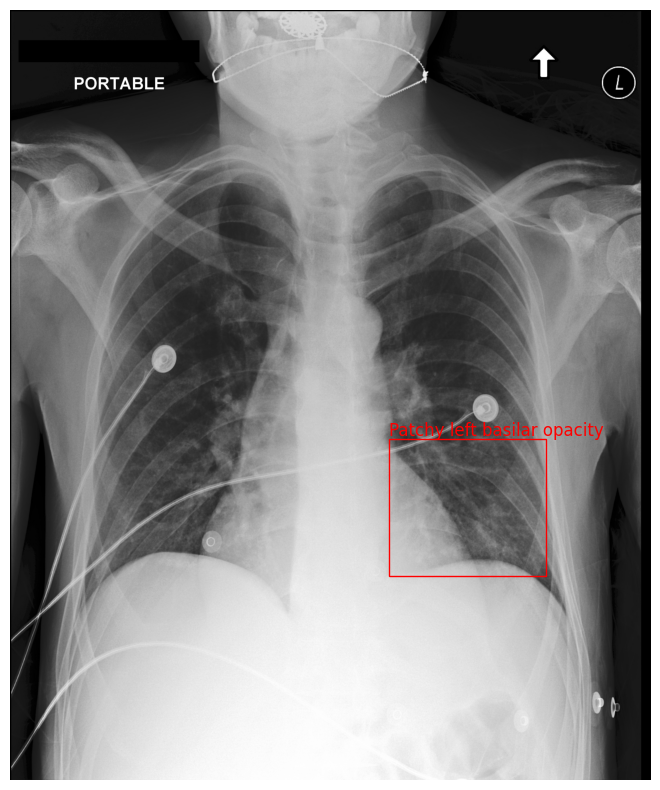

In [37]:
# pgav.visualize_dicom_id('2c84c825-2889fd51-2e46959d-586c6113-74033204')
pgav.visualize_random_dicom_id()

In [22]:
%run -n ../evaluation/plots.py

In [28]:
tmp[0]

['bilateral edema, consolidation, ground-glass opacities',
 'enlarged cardiac silhouette']

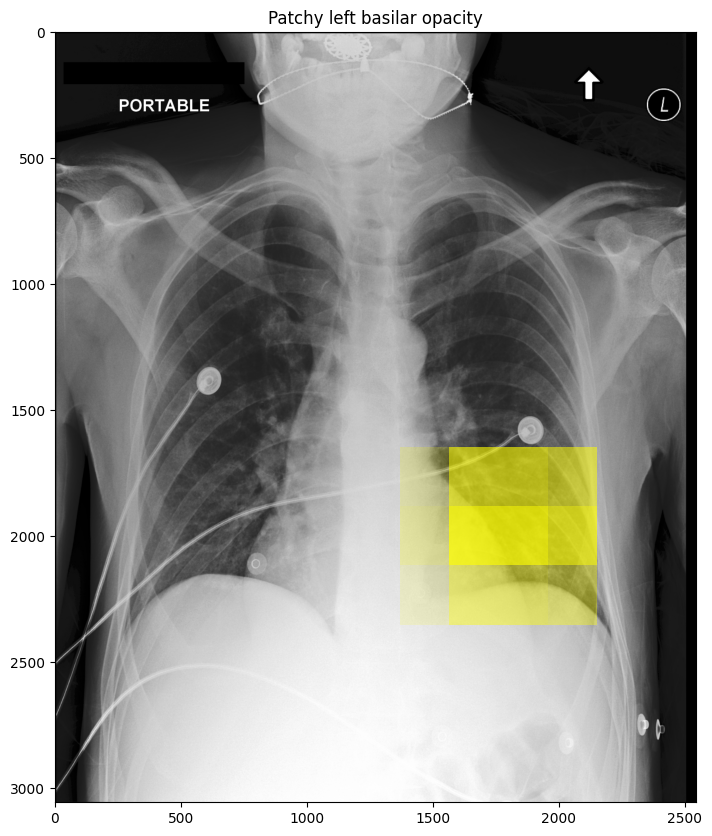

In [38]:
tmp = dicom_id_2_phrases_and_masks['3eeae468-58573d18-cfbc19d6-dfa2a900-7504dd2a']
visualize_attention_maps(
    image_path='/mnt/data/mimic-cxr-jpg/images/p10/p10296472/s55541245/3eeae468-58573d18-cfbc19d6-dfa2a900-7504dd2a.jpg',
    figsize=(10,10),
    attention_factor=0.8,
    attention_maps=[x.reshape(13, 13) for x in tmp[1]],
    titles=tmp[0],
)